<h1>Исследование рынка общественного питания Москвы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных-о-рынке-общественного-питания-Москвы" data-toc-modified-id="Анализ-данных-о-рынке-общественного-питания-Москвы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных о рынке общественного питания Москвы</a></span><ul class="toc-item"><li><span><a href="#Распределение-объектов-общественного-питания-по-типам" data-toc-modified-id="Распределение-объектов-общественного-питания-по-типам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение объектов общественного питания по типам</a></span></li><li><span><a href="#Соотношение-сетевых-и-несетевых-заведений-на-рынке" data-toc-modified-id="Соотношение-сетевых-и-несетевых-заведений-на-рынке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Соотношение сетевых и несетевых заведений на рынке</a></span></li><li><span><a href="#Характеристики-сетевого-распространения-заведений" data-toc-modified-id="Характеристики-сетевого-распространения-заведений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Характеристики сетевого распространения заведений</a></span></li><li><span><a href="#Анализ-среднего-количества-посадочных-мест" data-toc-modified-id="Анализ-среднего-количества-посадочных-мест-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ среднего количества посадочных мест</a></span></li><li><span><a href="#Анализ-территориального-размещения-объектов-питания" data-toc-modified-id="Анализ-территориального-размещения-объектов-питания-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Анализ территориального размещения объектов питания</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Описание проекта

Цель - открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Потенциальных инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время?
Инвесторы просят  подготовить исследование рынка по открытым данным о заведениях общественного питания в Москве и данным со списком всех улиц,районов и округов Москвы.

## Изучение данных 

In [1]:
# импорт библиотек 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import numpy as np
from numpy import median
import datetime as dt
from scipy import stats as st 
from pandas.plotting import register_matplotlib_converters
import warnings
from io import BytesIO
import requests
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
# настроим вывод таблиц так, чтобы содержимое строки отображолось полностью
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
# прочитаем датасеты и сохраним в переменные 
data = pd.read_csv('/datasets/rest_data.csv')
# выведем таблицу
display(data.head(10))
# получение общей информации о данных датасета
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Согласно документации к данным таблица  содержит:
 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

In [3]:
# посмотрим на уникальные значения каналов привлечения датасета orders
data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [4]:
# посмотрим на уникальные значения каналов привлечения датасета orders
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [5]:
# посмотрим статистическую инфо о посадочных местах
data.describe()

,id,number
count,"15,366.00","15,366.00"
mean,"119,720.07",59.55
std,"73,036.13",74.74
min,838.00,0.00
25%,"28,524.00",12.00
50%,"144,974.50",40.00
75%,"184,262.25",80.00
max,"223,439.00","1,700.00"


Просматривая статистическую информацию  и уникальные значения текстовых столбцов в данных не обнаружено значений, не соответствующих действительности .

Пропусков в датасете не выявлено. 

Для оптимальной работы изменим тип данных столбца chain с object на bool. У остальных столбцов датасета тип данных соответсвующий.

Для удобства работы с данными необходимо перевести значения object_name,address   датасета к нижнему регистру.




А также проверить данные датасета на явные дубликаты и неявные дубликаты.


##  Предобработка данных

Приведем значения  столбцов object_name,address датасета к нижнему регистру.

In [6]:
# приводим object_name и address к нижнему регистру
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()

Изменим тип данных столбца chain таблиц  с object на bool. 

In [7]:
# изменяем тип chain на bool  с помощью lambda функции
data['chain'] = data['chain'].apply( lambda x: np.where(x=='да', True, False))
# проверим
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 615.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Проверим датасеты на явные дубликаты.

In [8]:
print(data.duplicated().sum())
print(data['id'].duplicated().sum())
print(data[['object_name','address','number','object_type']].duplicated().sum())

0
0
85


В датасете есть 85 объектов, имеющих одинаковое название, тип и количество посадочных мест и располагающихся по одному и тому же адресу. Будем считать такие записи дубликатами. Вероятность того , что на одном адресе (даже в крупном торговом центре имеется 2 и более одинаковых точки питания с одинаковым количеством посадочных мест ) минимальна. 

Удалим из датасета такие дубликаты.

In [9]:
# удаляем дубликаты с помощью drop_duplicates
data = data.drop_duplicates(subset=['object_name','address','number','object_type']).reset_index(drop=True)
# проверка
print(data[['object_name','address','number','object_type']].duplicated().sum())

0


## Анализ данных о рынке общественного питания Москвы

### Распределение объектов общественного питания по типам

Исследуем  соотношение видов объектов общественного питания по количеству.

In [10]:
# сгруппируем количество объектов по типам заведений
numbers_object_type = data.groupby('object_type').agg({'object_name':'count'}).sort_values(by='object_name',ascending=False).reset_index()
# переименуем столбцы
numbers_object_type.columns = ['object_type','amount']
# посчитаем долю каждого типа заведений 
numbers_object_type['ratio'] = (numbers_object_type['amount']/numbers_object_type['amount'].sum()*100).round(1)
numbers_object_type

,object_type,amount,ratio
0,кафе,6071,39.70
1,столовая,2584,16.90
2,ресторан,2282,14.90
3,предприятие быстрого обслуживания,1897,12.40
4,бар,855,5.60
5,буфет,576,3.80
6,кафетерий,395,2.60
7,закусочная,348,2.30
8,магазин (отдел кулинарии),273,1.80


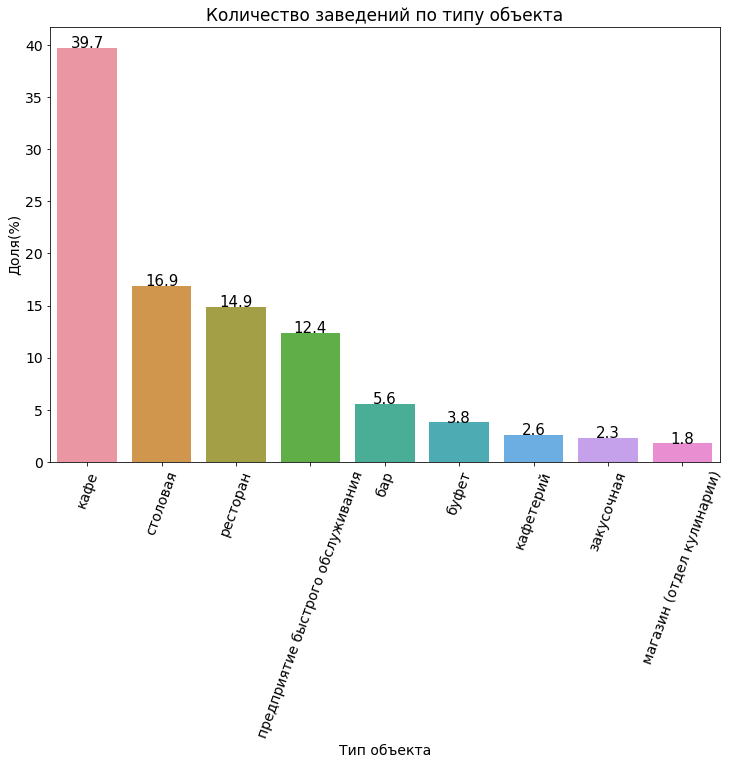

In [11]:
# функция, проставляющая значения над барами
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i].round(1), y[i].round(1), ha = 'center',fontsize=15)
# выберем стиль для графика
with plt.style.context('seaborn-pastel'):
    # столбчатая диаграмма
    plt.figure(figsize=(12, 8))
    plt.tick_params(labelsize=14)
    sns.barplot(x='object_type',y='ratio',data=numbers_object_type)
    plt.title('Количество заведений по типу объекта',fontsize=17)
    plt.xlabel('Тип объекта',fontsize=14)
    addlabels(numbers_object_type['object_type'],numbers_object_type['ratio'])
    plt.ylabel('Доля(%)',fontsize=14)
    plt.xticks(rotation=70)
    plt.show()

Наибольшее количество предприятий общественного питания организовано по типу кафе (6071шт.или 40%). Также в тройку самых популярных объектов питания входят столовые(2584 шт.-17%) и рестораны (2282 шт.-15%). Наименее распространненые - это отделы кулинарии, всего 273шт.,что составляет 2% от общего числа заведений.



### Соотношение сетевых и несетевых заведений на рынке 

Исследуем соотношение сетевых и несетевых заведений по их количеству. 

In [12]:
#numbers_chain = data.groupby('chain').agg({'id':'count'}).sort_values(by='id',ascending=False).reset_index()

# сводная таблица о количестве заведений в разрезе их типов 
numbers_chain_n =data.pivot_table(index='chain',columns='object_type',values='id',aggfunc=('count')).reset_index()
# переименование столбцов и замена значений булевых строк 
numbers_chain_n.columns = ['chain','бар','буфет','закусочная','кафе','кафетерий','кулинария','пред-ие быстрого обсл-е','ресторан','столовая']
numbers_chain_n['chain'] = np.where(numbers_chain_n['chain']==True,'сетевые','несетевые')
#общая сумма заведений 
numbers_chain_n['amount'] =(
                            numbers_chain_n['бар']+numbers_chain_n['буфет']+numbers_chain_n['закусочная']+
                            numbers_chain_n['кафе'] + numbers_chain_n['кафетерий']+ numbers_chain_n['кулинария']
                            +numbers_chain_n['пред-ие быстрого обсл-е']+numbers_chain_n['ресторан']
                            +numbers_chain_n['столовая']
                           )
#доля сетевых и несетевых
numbers_chain_n['ratio'] = (numbers_chain_n['amount']/numbers_chain_n['amount'].sum()*100).round(1)

display(numbers_chain_n.style.set_caption('Количество типов заведений,шт.'))                           

# сводная таблица о доле заведений в разрезе их типов
ratio_chain = (
    numbers_chain_n.loc[0:1,'бар':'amount']
    .div([numbers_chain_n.loc[0,'amount'],numbers_chain_n.loc[1,'amount']],axis=0)
    .round(3)
)
#подписываем строки
ratio_chain.loc[0,'chain'] = 'несетевые'
ratio_chain.loc[1,'chain'] = 'сетевые'

ratio_chain=ratio_chain[['chain','бар','буфет','закусочная','кафе','кафетерий','кулинария','пред-ие быстрого обсл-е','ресторан','столовая','amount']]

display(ratio_chain.style.set_caption('Доля типов заведений по способу организации(%)'))



,chain,бар,буфет,закусочная,кафе,кафетерий,кулинария,пред-ие быстрого обсл-е,ресторан,столовая,amount,ratio
0,несетевые,818,565,292,4675,343,195,1109,1739,2581,12317,80.600000
1,сетевые,37,11,56,1396,52,78,788,543,3,2964,19.400000


,chain,бар,буфет,закусочная,кафе,кафетерий,кулинария,пред-ие быстрого обсл-е,ресторан,столовая,amount
0,несетевые,0.066000,0.046000,0.024000,0.380000,0.028000,0.016000,0.090000,0.141000,0.210000,1.000000
1,сетевые,0.012000,0.004000,0.019000,0.471000,0.018000,0.026000,0.266000,0.183000,0.001000,1.000000


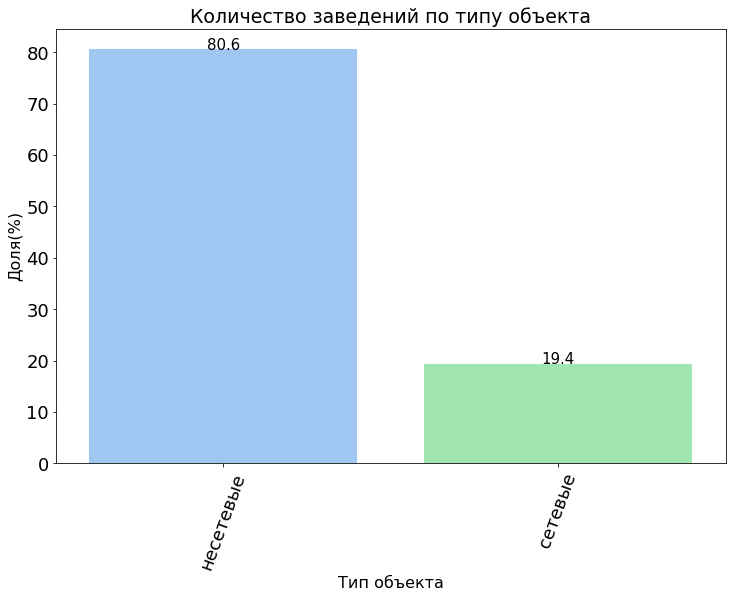

In [13]:
# построим столбчатый график доли заведений по типу организации
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(12, 8))
    plt.tick_params(labelsize=18)
    sns.barplot(x='chain',y='ratio',data=numbers_chain_n)
    plt.title('Количество заведений по типу объекта',fontsize=19)
    plt.xlabel('Тип объекта',fontsize=16)
    addlabels(numbers_chain_n['chain'],numbers_chain_n['ratio'])
    plt.ylabel('Доля(%)',fontsize=16)
    plt.xticks(rotation=70)
    plt.show()
    

Основная масса заведений (81%) принадлежит к категории несетевых заведений и только 19% или 2964шт. относится к сетевым учреждениям.

 Распределение типов заведений внутри категорий(сеть/не сеть) похожа. Для обеих категорий наиболее распространнеными являются кафе и рестораны, также для сетей -фастфуды а для несетевых заведений -столовые.Доля остальных типов заведений  в обеих категориях невысокая.

### Характеристики сетевого распространения заведений

,type,ratio
0,бар,4.33
1,буфет,1.91
2,закусочная,16.09
3,кафе,22.99
4,кафетерий,13.16
5,кулинария,28.57
6,пред-ие быстрого обсл-е,41.54
7,ресторан,23.79
8,столовая,0.12


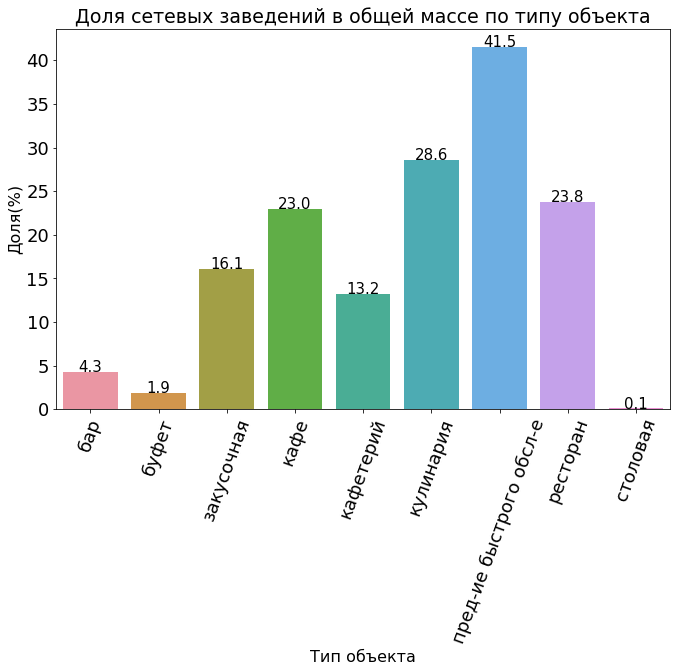

In [14]:
# построим круговую диаграмму доли заведений по типу организации
#list = numbers_chain_n.loc[0:1,'бар':'столовая'].columns.values.tolist()
#values = numbers_chain_n.loc[1,'бар':'столовая'].tolist()
#fig = go.Figure(data=[go.Pie(labels=list, values=values)])
#fig.show()
# построим таблицу с долями сетевых заведений от общей массы заведений
ratio_chain_type = ((numbers_chain_n.loc[1,'бар':'столовая']/numbers_chain_n.loc[0:1,'бар':'столовая'].sum())*100).to_frame().reset_index()
ratio_chain_type.columns = ['type','ratio']
display(ratio_chain_type)
# построим столбчатый график доли сетевых заведений по типу организации
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(11, 7))
    plt.tick_params(labelsize=18)
    sns.barplot(x='type',y='ratio',data=ratio_chain_type)
    plt.title('Доля сетевых заведений в общей массе по типу объекта',fontsize=19)
    plt.xlabel('Тип объекта',fontsize=16)
    addlabels(ratio_chain_type['type'],ratio_chain_type['ratio'])
    plt.ylabel('Доля(%)',fontsize=16)
    plt.xticks(rotation=70)
    plt.show()

Сетевое распространение наиболее характерно для предприятий быстрого обслуживания - 42% от общей массы фастфуда. 

29% заведений, открытых в формате отдела кулинарии, приходятся на сети.

24% заведений приходится на сетевые рестораны. Доля сетевых кафе практически совпадает с долей сетевых ресторанов и равна 23%.
Столовые, в основном , открывают несетевые игроки.

Определим какое количесво точек внутри сети и посадочных мест в одном заведении  характерно для сетевых заведений.

In [15]:
# сгруппируем сетевые заведения по наименованиям сетей в разрезе точек внутри сети и количества посадочных мест
chain_name_group = data.query('chain == True').groupby('object_name').agg({'object_name':'count','number':'median'})
chain_name_group.columns = ['amount','seats']
display(chain_name_group.sort_values(by='amount',ascending=False))


,amount,seats
object_name,,
шоколадница,157,50.00
kfc,155,45.00
макдоналдс,150,77.50
бургер кинг,137,45.00
теремок,94,23.00
...,...,...
кафе «хлеб насущный»,1,38.00
кафе «урюк» хивинская чайхона,1,50.00
кафе «торнадо»,1,80.00


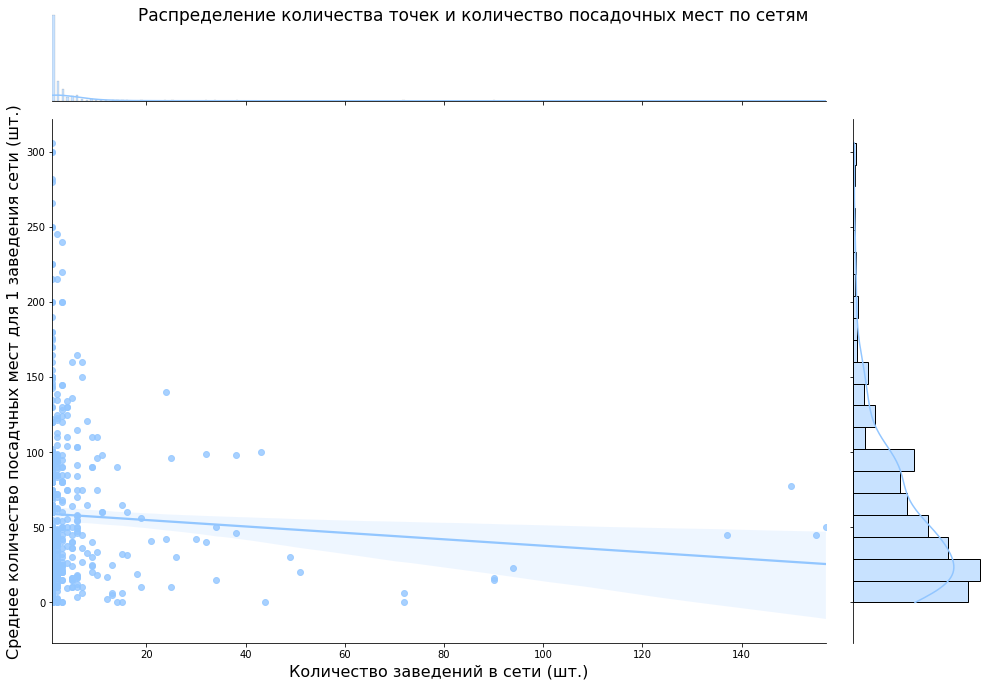

In [16]:
# точечная диаграмма связи двух переменных: точек и посадочных мест
with plt.style.context('seaborn-pastel'):
    ax =sns.jointplot(x='amount', y='seats', data=chain_name_group, kind='reg')
    ax.fig.set_figheight(10)
    ax.fig.set_figwidth(15)
    ax.fig.suptitle("Распределение количества точек и количество посадочных мест по сетям",fontsize=17)
    ax.set_axis_labels('Количество заведений в сети (шт.)', 'Среднее количество посадчных мест для 1 заведения сети (шт.)', fontsize=16)
    plt.show()
    

На графике видно множество точек соответствующих количеству точек в сети равному 1, что для сетевого заведения будет неверно. Вероятнее всего, это неявные дубликаты. Так как все данные дубликаты не представляется возможным исправить вручную, рассмотрим распределение количества точек и количества посадочных мест без данных записей.

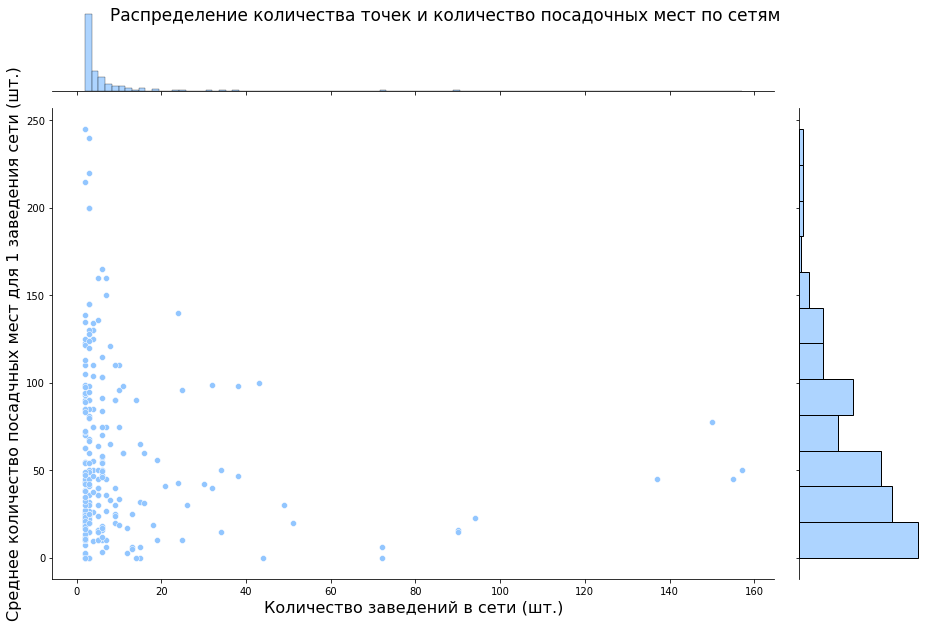

20% заведений имеют не более 17.5  посадочных мест
90% заведений имеют не более 122.25  посадочных мест
70% заведений имеют не более 6.0 точек в сети
80% заведений имеют не более 10.0 точек в сети


In [17]:
# оставляем только сети с количеством точек более 2 
chain_name_group_filt = chain_name_group[chain_name_group['amount']>1]

# точечная диаграмма связи двух переменных: точек и посадочных мест
with plt.style.context('seaborn-pastel'):
    ax = sns.jointplot(x='amount', y='seats', data=chain_name_group_filt,kind='scatter')
    ax.fig.set_figheight(9)
    ax.fig.set_figwidth(14)
    ax.fig.suptitle("Распределение количества точек и количество посадочных мест по сетям",fontsize=17)
    ax.set_axis_labels('Количество заведений в сети (шт.)', 'Среднее количество посадчных мест для 1 заведения сети (шт.)', fontsize=16)
    plt.show()
# посчитаем перцентили 
print('20% заведений имеют не более',np.percentile(chain_name_group_filt['seats'], 20),' посадочных мест')
print('90% заведений имеют не более',np.percentile(chain_name_group_filt['seats'], 90),' посадочных мест')
print('70% заведений имеют не более',np.percentile(chain_name_group_filt['amount'], 70),'точек в сети')
print('80% заведений имеют не более',np.percentile(chain_name_group_filt['amount'], 80),'точек в сети')



По графику видно , что основная масса сетевых заведений имеют небольшое количество точек в своей сети и большое количество посадочных мест.

Так 70% сетей имеют не более 6 точек в сети , еще 10% имеют от 6 до 10 точек, и только 20% сетей имеют более 10 точек.

Для 70% сетей характерно от 17 до 122 посадочных мест в среднем на 1 заведение, 10% сетей имеют более 122 посадочных мест в заведении.

Есть единичные сетевые рекордстмены: сети обладающие или огромных количеством посадочных мест, или широким распространением своих заведений в Москве.

### Анализ среднего количества посадочных мест 

Опишем среднее количество посадочных мест для каждого вида объекта общественного питания. Определим какой вид предоставляет в среднем самое большое количество посадочных мест.

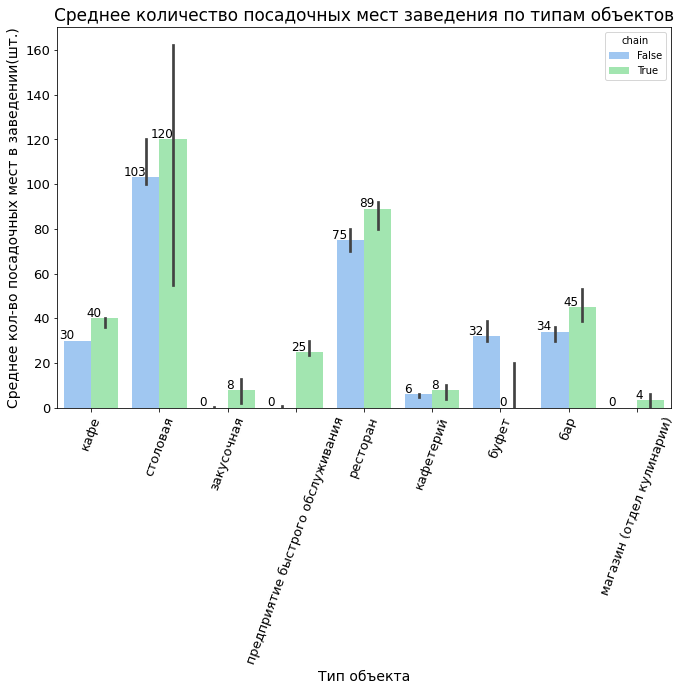

In [18]:
# столбчатая диаграмма медианного значения посадочных мест 
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(11, 7))
    plt.tick_params(labelsize=13)
    ax = sns.barplot(x='object_type', y='number', data=data,estimator=median,hue='chain')
    
# проставим подписи на барах
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 10,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')
    
    plt.xticks(rotation=70)
    plt.title('Среднее количество посадочных мест заведения по типам объектов',fontsize=17)
    plt.xlabel('Тип объекта',fontsize=14)
    plt.ylabel('Среднее кол-во посадочных мест в заведении(шт.)',fontsize=14)
    plt.show()
    


И для сетевых заведений , и для несетевых характерны одинаковые типы заведений с наибольшим количеством посадочных мест.  Но несетевые заведения, в основном, обладают меньшей вместимостью, чем сетевые.

Также наибольшее среднее количество посадочных мест характерно для заведений , которые чаще всего встречаются на рынке Москвы.

Для сетевых заведений три типа с наибольшим  количеством посадочных мест на 1 заведение - это:
 
 - столовая (120 шт.)
 - ресторан (89 шт.)
 - бар (45 шт.)

Также высоким количеством посадочных мест располагают сетевые кафе (40 шт.) и предприятия быстрого обслуживания (25 шт.). В остальных типах заведений либо невысокое количество посадочных мест , либо они отсутствуют.

Для несетевых заведений три типа с наибольшим  количеством посадочных мест на 1 заведение - это также :
 
 - столовая (103 шт.)
 - ресторан (75 шт.)
 - бар (34 шт.)
 
Несетевые буфеты и кафе имеют, в среднем, практически одинаковое количество посадочных мест, как и несетевые бары - 32 и 30 шт соответственно.



### Анализ территориального размещения объектов питания 

Выделим в отдельный столбец информацию об улице из столбца address

In [19]:
# список схожих обозначений для улицы
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
# функция выделяющая улицу с помощью строковых методов (возвращения индекса подстроки)
def street_finder(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.find(street_type)!= -1:
                return address_part
# применение функции к address и запиись в новый столбец
data['street'] = data['address'].apply(street_finder)
# удаление строк, для которых улица не определилась
data = data[~(data['street'].isnull())]

#проверим , что все строки заполнены
data[data['street'].isna()]
display(data.head(10))

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,False,столовая,"город москва, абрамцевская улица, дом 15, корпус 1",240,абрамцевская улица
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строение 1",90,авиамоторная улица
8,20958,кпф семья-1,False,столовая,"город москва, авиамоторная улица, дом 8, строение 1",150,авиамоторная улица
9,28858,столовая мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строение 1",120,авиамоторная улица


Построим график - топ-10 улиц по количеству объектов общественного питания и определим в каких районах Москвы находятся эти улицы.

,street,object_name,ratio
1076,проспект мира,203,1.36
1080,профсоюзная улица,182,1.22
701,ленинградский проспект,172,1.15
1031,пресненская набережная,167,1.12
410,варшавское шоссе,165,1.11
704,ленинский проспект,148,0.99
1072,проспект вернадского,128,0.86
691,кутузовский проспект,114,0.77
611,каширское шоссе,111,0.74
621,кировоградская улица,108,0.72


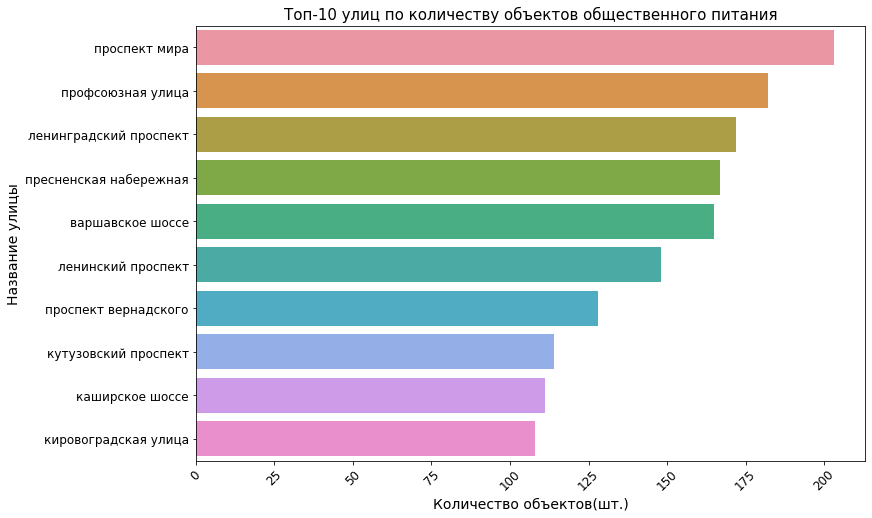

In [20]:
# группировка точек питания по улице и выделение топ-10
street_grouped = (
        data.groupby('street', as_index=False)
        .agg({'object_name':'count'})
        .sort_values(by='object_name',ascending=False)
).head(10)
street_grouped['ratio'] = (street_grouped['object_name']/len(data['object_name'])*100).round(2)
display(street_grouped)
# график горизонтальной столбчатой диаграммы топ-10 улиц
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(12, 8))
    plt.tick_params(labelsize=12)
    ax = sns.barplot(x='object_name', y='street', data=street_grouped)
    ax.set_title('Топ-10 улиц по количеству объектов общественного питания',fontsize=15)
    ax.set_xlabel('Количество объектов(шт.)',fontsize=14)
    ax.set_ylabel('Название улицы',fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


Для части улиц вхождение в список обусловила их большая протяженность (например, протяженность проспекта мира - 8,9км,) , для другой части - расположение в популярных районах, где много деловых и развлекательных объектов (пресненская набережная и тд)

1 место по количеству заведений занимает проспект Мира, на нем расположено 203 заведения, следущей по количеству заведений является профсоюзная улица (182 объекта), тройку лидеров замыкает ленинградский проспект с 172 заведениями.

По относительному показателю соотношения количества объектов на конкретной улице к общему количеству объектов в Москве все 10 популярных улиц имеют небольшое различие. Так между самым популярным проспектом Мира и кировоградской улицей, находящейся на 10 месте расхождение не превышает и 1%.

Определим к каким районам относятся улицы с наибольшим количеством заведений.

Для этого загрузим внешний файл (взят с сайта Мосгаза) со списком всех улиц, районов и округов.

In [21]:
# импорт внешнего файла с улицами/районами 
spreadsheet_id = '1MhxdNtXiuSyEo0qkRv5ky7Yzoi6v_a9KCzm6edfXgNw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
area = pd.read_csv(BytesIO(r.content))
area['streetname'] = area['streetname'].str.lower()
area.head()

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [22]:
# список топ-10 улиц
list = street_grouped['street'].to_list()
# фильтрация файла с улицами по вхождению в список топ-10
street_area = area[area['streetname'].isin(list)].sort_values(by='streetname').reset_index(drop=True)
# оставим только столбцы с улицей и районом
street_area = street_area[['streetname','area','okrug']]
street_area

,streetname,area,okrug
0,варшавское шоссе,Донской район,ЮАО
1,варшавское шоссе,Район Южное Бутово,ЮЗАО
2,варшавское шоссе,Район Чертаново Южное,ЮАО
3,варшавское шоссе,Район Северное Бутово,ЮЗАО
4,варшавское шоссе,Район Чертаново Северное,ЮАО
5,варшавское шоссе,Район Чертаново Центральное,ЮАО
6,варшавское шоссе,Нагорный район,ЮАО
7,варшавское шоссе,Район Нагатино-Садовники,ЮАО
8,каширское шоссе,Район Нагатино-Садовники,ЮАО
9,каширское шоссе,Район Москворечье-Сабурово,ЮАО


In [23]:
# группируем список улиц с районам по улицам и считаем количество районов
display(street_area.groupby('streetname').agg({'area':'count'}).sort_values(by='area',ascending=False))
#display(street_area.groupby('okrug').agg({'okrug':'count'}))


,area
streetname,
варшавское шоссе,8
ленинский проспект,8
проспект мира,7
профсоюзная улица,6
проспект вернадского,5
каширское шоссе,4
ленинградский проспект,4
кировоградская улица,3
кутузовский проспект,2


Все улицы (за искл. пресненской набережной) входят сразу в несколько районов. 
Так варшавское шоссе протяженностью 22,5 км входит сразу в 8 районов, как и ленинский проспект (8 районов).


Определим число улиц с одним объектом общественного питания, посмотрим в каких районах Москвы находятся эти улицы.

In [24]:
# группируем количество заведений по улице и выбираем заведения с 1 точкой
street_grouped_one = (
        data.groupby('street', as_index=False)
        .agg({'object_name':'count'})
        .sort_values(by='object_name',ascending=False)
        .query('object_name==1')
)
street_grouped_one = street_grouped_one.reset_index( drop=True)
display(street_grouped_one)
display('Количество улиц с одним объектом общественного питания - {} шт.'.format(street_grouped_one['street'].count()))


,street,object_name
0,улица рокотова,1
1,улица рословка,1
2,варсонофьевский переулок,1
3,вербная улица,1
4,улица ротерта,1
...,...,...
546,кривоарбатский переулок,1
547,улица девятая рота,1
548,кремлёвская набережная,1
549,улица демьяна бедного,1


'Количество улиц с одним объектом общественного питания - 551 шт.'

Посмотрим к каким районам принадлежат данные улицы

In [25]:
# список улиц с 1 заведением
list = street_grouped_one['street'].to_list()
# выделение районов улиц с 1 заведением
street_area_one = area[area['streetname'].isin(list)].sort_values(by='streetname').reset_index(drop=True)
street_area_one = street_area_one[['streetname','area','okrug']]
print('Количество районов, содержащих 1 улицу -',len(street_area_one['area'].unique()))
print('Районы ЦАО,включающие улицы с 1 объектом общественного питания')
# районы с улицами по 1 заведению, входящие в ЦАО
display(street_area_one.query('okrug=="ЦАО"').agg({'area':'unique'}))

merged_streets = street_grouped_one.merge(area,how='left',left_on = 'street',right_on='streetname')
# проверка для скольки улиц не нашлось района
display(merged_streets.isna().sum()/len(list)*100)

Количество районов, содержащих 1 улицу - 101
Районы ЦАО,включающие улицы с 1 объектом общественного питания


area    [Басманный район, Красносельский район, Район Якиманка, Район Хамовники, Мещанский район, Таганский район, Район Замоскворечье, Район Арбат, Тверской район, Пресненский район]
dtype: object

street        0.00
object_name   0.00
streetname    6.35
areaid        6.35
okrug         6.35
area          6.35
dtype: float64

## Выводы

Цель проводимого исследования - исследование и анализ рынка общественного питания в Москве для определения потенциала кафе,планируемого к открытию.

В ходе анализа было установлено, что :

 1. Наиболее популярные типы заведений на рынке Москвы - это кафе, столовые, рестораны и предприятия быстрого обслуживания.
 
 Наибольшее количество предприятий общественного питания представлено кафе - 40%. Также в тройку самых популярных объектов питания входят столовые и рестораны, занимая 17% и 15% рынка соответственно. Наименее распространненые типы заведений - это отделы кулинарии и закусочные.
 
 
 2. Основную долю рынка общественного питания Москвы занимают несетевые заведения.
 
 Доля рынка несетевых заведений составляет 81% , и только 19% приходится на сетевые заведения.Основная масса рынка - это одиночные игроки, что позволит проекту избежать конкуренции с крупными сетями и их узнаваемым брендом.
 
 
 3. Для предприятий быстрого обслуживания характерно сетевое распространение.

 Доля сетей на рынке фастфуда составляет 42%. Также высок уровень сетевого распространения для отделов кулинарии (29%),ресторанов(24%) и кафе(23%). Среди столовых практически нет сетевых заведений.
 
 
 4. Для сетевых заведений характерно невысокое количество точек внутри сети с высоким количеством посадочных мест внутри заведений.
 
 Для 70% характерно не более 6 точек внутри сети и от 17 до 122 посадочных мест в среднем внутри точки.
 
 5. Распределение среднего количества посадочных мест снутри заведения по типам заведений совпадает для сетевых и несетевых организаций.
 
 Наиболее вместимыми оказались столовые, рестораны и бары, что связано с длительностью времени посещения  (рестораны и бары) клиентами и желанием не терять по этой причине часть выручки или с однократностью посещения клиентами(столовая) в течения дня, во время обеда. 
 
 6. Наиболее популярными улицами по количеству размещенных объектов питания являются основные транспортные магистрали Москвы.
 
 Количество заведений на улицу из списка самых популярных приходится от 108 до 203 заведений , что в процентном соотношение к общему количество заведений в Москве составляет от 0,7 до 1,4 % . Такие улицы за счет своей протяженности принадлежат сразу нескольким районам и округам. 
 
 7. Есть улицы с небольшой нагрузкой в части заведений общественного питания , на которых не более 1 заведения.
 
 В том числе среди таких улиц есть улицы, находящиеся в ЦАО.
 
 
По результатам исследования для открытия кафе можно порекомендовать улицы центрального административного округа, находящиеся в  следующих районах:
    
    - Басманный район, 
    - Красносельский район,
    - Район Якиманка, 
    - Район Хамовники, 
    - Мещанский район, 
    - Таганский район, 
    - Район Замоскворечье, 
    - Район Арбат, 
    - Тверской район, 
    - Пресненский район.
Оригинальный формат заведения (людей обслуживают роботы ) позволяет выбрать данные улицы, несмотря на то, что они обладают низкой  плотностью заведений общественного питания. При выборе улицы также необходимо будет обратить внимание на ее проходимость. 

В качестве формата заведения можно выбрать  кафе или предприятие быстрого обслуживания, как наиболее популярный тип общественного питания для Москвы. Другие распространенные виды не подойдут вследствии специфики обслуживания роботами.Например, рестораны требуют индивидуального подхода к клиенту, а использование роботов предполагает стандартизацию процессов .

Типичное количество посадочных мест для такого вида заведения равно 30-40 мест. 
Для проекта есть переспектива роста в сетевое заведение(оптимальное число точек - до 6-10 заведений) с увеличением количества посадочных мест.






Презентация: https://drive.google.com/file/d/1W_6oTKUslPwTJdUjJT_lQHiZLb3m_dlv/view?usp=sharing